In [1]:
from PIL import Image
import os

# Path to your images folder
folder_path = "gen_images/"

# Load images
images = []
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  # Assuming images are in PNG format
        img = Image.open(os.path.join(folder_path, filename))
        images.append(img)


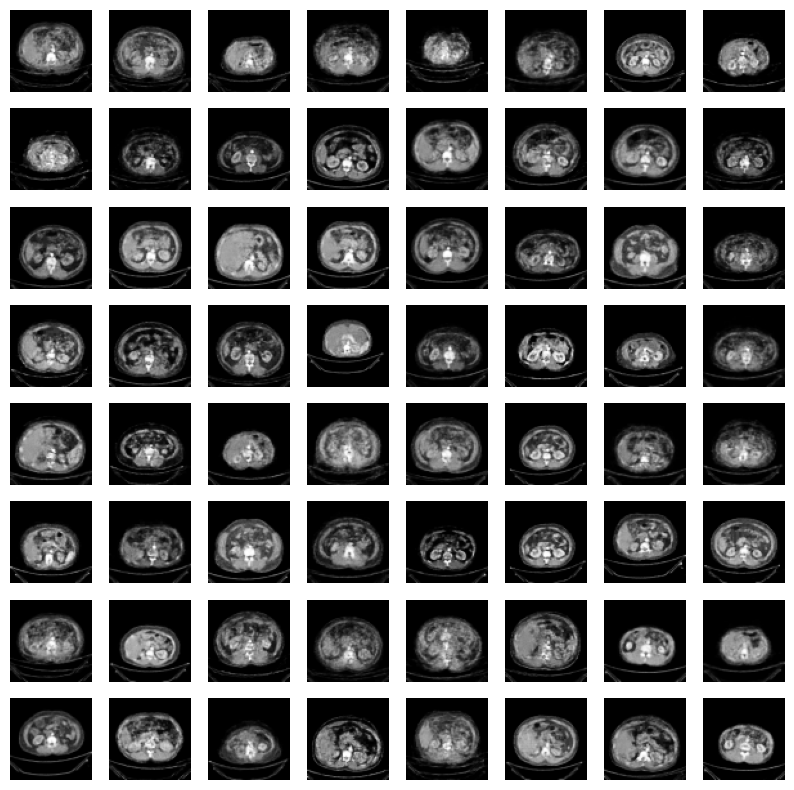

In [2]:
import matplotlib.pyplot as plt

# Define the grid layout
rows = 8
cols = 8

# Create a new figure
fig = plt.figure(figsize=(10, 10))

# Plot images
for i in range(1, rows * cols + 1):
    fig.add_subplot(rows, cols, i)
    plt.imshow(images[i - 1], cmap='gray')
    plt.axis('off')

plt.show()


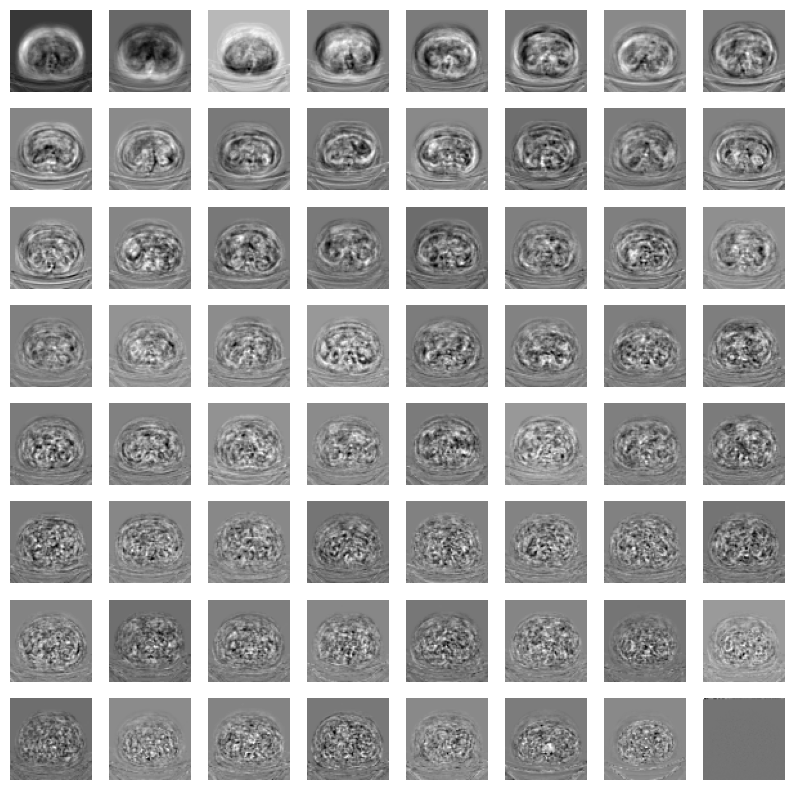

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the grid layout
rows = 8
cols = 8

# Convert PIL images to numpy arrays
image_arrays = [np.array(image) for image in images]

# Flatten the images
flattened_images = [image.flatten() for image in image_arrays]

# Convert the list of flattened images into a 2D numpy array
X = np.array(flattened_images)

# Perform PCA
pca = PCA(n_components=64)  # Assuming you want to keep all principal components
pca.fit(X)

# Get the eigenimages
eigenimages = pca.components_.reshape(-1, image_arrays[0].shape[0], image_arrays[0].shape[1])

# Create a new figure
fig = plt.figure(figsize=(10, 10))

# Plot eigenimages
for i in range(1, rows * cols + 1):
    fig.add_subplot(rows, cols, i)
    plt.imshow(eigenimages[i - 1], cmap='gray')
    plt.axis('off')

plt.show()
